<a href="https://colab.research.google.com/github/akshitsingh07/Image-Classification-on-Imbalanced-Dataset/blob/main/Balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import auc

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Normalize pixel values to the range [0, 1]
X /= 255.0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1575/1575 [==============================] - 7s 4ms/step - loss: 0.2172 - accuracy: 0.9344 - val_loss: 0.1150 - val_accuracy: 0.9643
Epoch 2/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0887 - val_accuracy: 0.9720
Epoch 3/10
1575/1575 [==============================] - 6s 4ms/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0960 - val_accuracy: 0.9711
Epoch 4/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0850 - val_accuracy: 0.9759
Epoch 5/10
1575/1575 [==============================] - 6s 4ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0800 - val_accuracy: 0.9775
Epoch 6/10
1575/1575 [==============================] - 6s 4ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0785 - val_accuracy: 0.9786
Epoch 7/10
1575/1575 [==============================] - 6s 4ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0860 - val_accuracy:

438/438 [==============================] - 1s 2ms/step


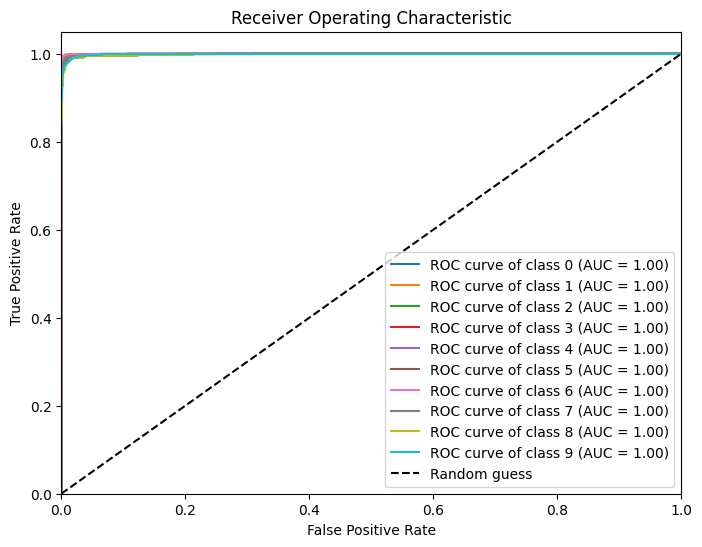

Accuracy: 0.97
Recall: 0.97
F1 Score: 0.97
AUC: 1.00


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
fpr = {}
tpr = {}
roc_auc_dict = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc_dict[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(roc_auc))